# Wines Points prediction 

In [138]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [139]:
#%pip install cufflinks

In [140]:
import pandas as pd
import cufflinks as cf; cf.go_offline()

In [141]:
wine_reviews = pd.read_csv("C:/Users/mor/Python_ML_2023/data/winemag-data-130k-v2.csv")
wine_reviews.shape

(129971, 14)

In [142]:

## https://www.kaggle.com/datasets/zynicide/wine-reviews

In [143]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [144]:
wine_reviews = wine_reviews.drop(columns = ['Unnamed: 0'])
wine_reviews = wine_reviews.drop_duplicates()
wine_reviews.shape

(119988, 13)

In [37]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [128]:
wine_reviews.points.isnull().sum()

0

In [129]:
wine_reviews.isnull().sum()

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

In [40]:
avg_points_by_country = wine_reviews.groupby(['country','province']).points.mean()
avg_points_by_country.head(10)

country    province         
Argentina  Mendoza Province     86.765306
           Other                85.956522
Armenia    Armenia              87.500000
Australia  Australia Other      85.467532
           New South Wales      87.719512
           South Australia      89.021243
           Tasmania             89.000000
           Victoria             88.831683
           Western Australia    88.930657
Austria    Austria              87.307692
Name: points, dtype: float64

In [41]:
avg_points_by_taster = wine_reviews.groupby('taster_name').points.mean()
avg_points_by_taster.head(10)

taster_name
Alexander Peartree    85.780679
Anna Lee C. Iijima    88.416480
Anne Krebiehl MW      90.625228
Carrie Dykes          86.356589
Christina Pickard     87.833333
Fiona Adams           86.750000
Jeff Jenssen          88.330275
Jim Gordon            88.603558
Joe Czerwinski        88.524339
Kerin O’Keefe         88.897803
Name: points, dtype: float64

In [42]:
avg_points_by_price = wine_reviews.groupby('price').points.mean()
avg_points_by_price.tail(10)

price
1100.0     95.5
1125.0     94.0
1200.0     96.0
1300.0     96.0
1500.0    100.0
1900.0     98.0
2000.0     96.5
2013.0     91.0
2500.0     96.0
3300.0     88.0
Name: points, dtype: float64

In [43]:
wine_reviews.points.describe()

count    119988.000000
mean         88.442236
std           3.092915
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

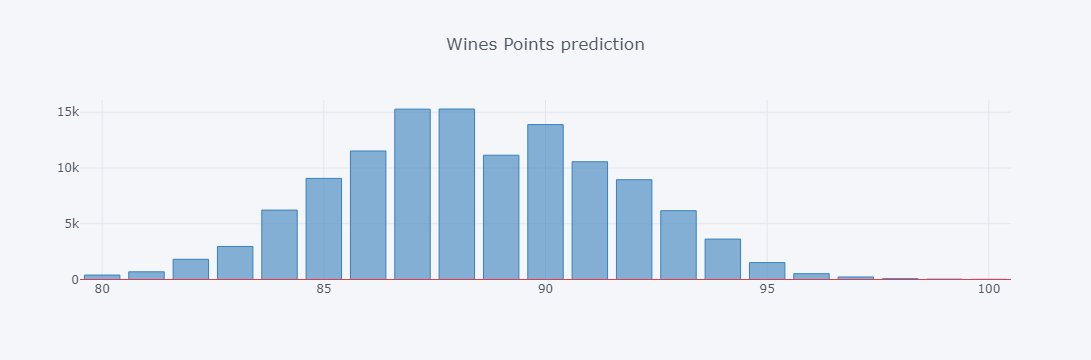

In [44]:
wine_reviews.points.value_counts().iplot(kind='bar', title= 'Wines Points prediction',hline=(0), color = 'blue')

In [45]:
wine_reviews.country.value_counts().div(wine_reviews.shape[0]).head()

US          0.420517
France      0.169625
Italy       0.149515
Spain       0.050972
Portugal    0.043804
Name: country, dtype: float64

In [46]:
wine_reviews.price.describe()

count    111593.000000
mean         35.620747
std          42.103728
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [145]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report

from sklearn.ensemble import RandomForestRegressor
from scipy.sparse import hstack

In [151]:
data = wine_reviews[['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery', 'price', 'points']]
categorical_features = data.iloc[:, :-2]
numerical_feature = data['price']

encoded_features = pd.DataFrame()

for column in categorical_features.columns:
    top_20_categories = categorical_features[column].value_counts().nlargest(20).index
    top_20_features = categorical_features[column].map(lambda x: str(x) if str(x) in top_20_categories else 'Other')
    
    # Apply one-hot encoding to the categorical feature
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(top_20_features.values.reshape(-1, 1))
    encoded_df = pd.DataFrame(encoded_data, columns=[f"{column}_{category}" for category in encoder.categories_[0]])
    
    encoded_features = pd.concat([encoded_features, encoded_df], axis=1)

# Concatenate the encoded features with the numerical feature 'price'
data_encoded = pd.concat([encoded_features, numerical_feature], axis=1)

# Calculate the correlation matrix between categorical features and 'points'
correlation_categorical = categorical_features.apply(lambda x: pd.factorize(x)[0]).corrwith(data['points'])

# Calculate the correlation between numerical feature 'price' and 'points'
correlation_numerical = numerical_feature.corr(data['points'])
correlation_matrix = pd.concat([correlation_categorical, pd.Series(correlation_numerical, index=['price'])], axis=0)

print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
country                 -0.038390
designation              0.078566
province                -0.042801
region_1                -0.020090
region_2                -0.036119
taster_name              0.068979
taster_twitter_handle    0.076368
title                    0.006851
variety                 -0.058570
winery                  -0.116193
price                    0.416534
dtype: float64


In [132]:
# Set the threshold for feature selection
threshold = 0.1

# Filter out features below the threshold
selected_features = correlation_matrix[abs(correlation_matrix) >= threshold]

print("Selected features based on correlation threshold of", threshold, ":")
print(selected_features)

Selected features based on correlation threshold of 0.1 :
winery   -0.116193
price     0.416534
dtype: float64


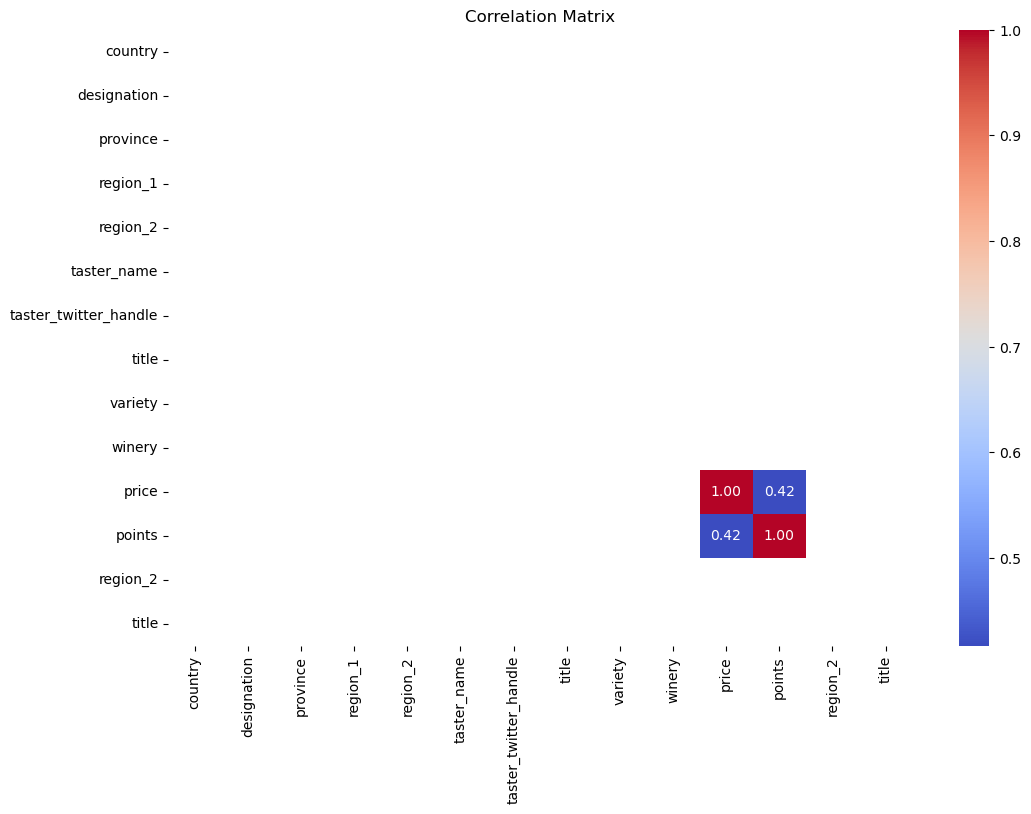

In [161]:
# Calculate the correlation matrix for numeric columns only

# Add missing features to the correlation matrix
missing_features = ['region_2', 'title']
correlation_matrix = correlation_matrix.reindex(index=data.columns.tolist() + missing_features, columns=data.columns.tolist() + missing_features)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [107]:
wine_reviews = wine_reviews.drop(columns = ['region_2'])
wine_reviews.shape

(119988, 12)

In [108]:
wine_reviews = wine_reviews.drop(columns = ['taster_twitter_handle'])
wine_reviews.shape

(119988, 11)

In [21]:
wine_reviews.isnull().sum()

country           59
description        0
designation    34545
points             0
price           8395
province          59
region_1       19560
taster_name    24917
title              0
variety            1
winery             0
dtype: int64

In [109]:
wine_reviews_check = wine_reviews
wine_reviews_check = wine_reviews_check.dropna()
wine_reviews_check.shape

(111593, 11)

In [110]:
wine_reviews = wine_reviews.dropna()
wine_reviews.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
1,31,"This is ripe and fruity, a wine that is smooth...",2325,87,15.0,108,1229,15,Quinta dos Avidagos 2011 Avidagos Red (Douro),450,12956
2,40,"Tart and snappy, the flavors of lime flesh and...",37979,87,14.0,268,1217,14,Rainstorm 2013 Pinot Gris (Willamette Valley),436,13018
3,40,"Pineapple rind, lemon pith and orange blossom ...",27974,87,13.0,218,549,0,St. Julian 2013 Reserve Late Harvest Riesling ...,479,14390
4,40,"Much like the regular bottling from 2012, this...",36465,87,65.0,268,1217,14,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,440,14621
5,37,Blackberry and raspberry aromas show a typical...,1977,87,15.0,262,757,12,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,590,14706


In [111]:
wine_reviews.nunique()

country            43
description    111567
designation     35777
points             21
price             390
province          423
region_1         1205
taster_name        20
title          110638
variety           698
winery          15855
dtype: int64

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

# Drop any rows with missing values in the 'title' and 'points' columns
data = wine_reviews.dropna(subset=['title', 'points'])

# Select the 'title' and 'points' columns for correlation analysis
title = data['title']
points = data['points']

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'title' column using CountVectorizer
encoded_data = vectorizer.fit_transform(title)

# Convert the sparse matrix to a DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=vectorizer.get_feature_names_out())

# Concatenate the DataFrame with the 'points' column
data_encoded = pd.concat([encoded_df, points], axis=1)

# Calculate the correlation between the encoded features and 'points'
correlation = data_encoded.corr()['points'].drop('points')

# Print the correlation values
print(correlation)
if all(correlation > -0.2) or all(correlation < 0.2):
    print("Uncorrelated")
else:
    print("Correlated")


         points    points
006   -0.000121  0.004783
01    -0.000099  0.000127
010   -0.000070       NaN
012   -0.000099  0.009476
012n  -0.000070       NaN
...         ...       ...
óscar -0.000070 -0.011644
öko   -0.000070       NaN
única -0.000099  0.014170
único -0.000140  0.005575
über  -0.000099 -0.004852

[22328 rows x 2 columns]
Uncorrelated


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a new DataFrame with the desired columns
data = wine_reviews[['country', 'province', 'region_1', 'points']]

# Extract the categorical features
categorical_features = data[['country', 'province', 'region_1']]

# Perform one-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(categorical_features)

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(categorical_features.columns)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded features with the target variable
data_encoded = pd.concat([encoded_df, data['points']], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Extract the correlation values for the 'points' column
correlation_with_points = correlation_matrix['points']

# Print the correlation values
print(correlation_with_points)


In [96]:
# Select the relevant columns
numerical_cols = ['points', 'price']
categorical_cols = ['country', 'province', 'region_1', 'region_2', 'variety', 'winery']
text_cols = ['description']

# Define the preprocessing steps for each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols),
        ('text', CountVectorizer(), text_cols)
    ],
    sparse_threshold=0
)

# Apply transformations
X_transformed = preprocessor.fit_transform(wine_reviews)

# Combine the transformed arrays as sparse matrix
combined_sparse = hstack(X_transformed)

# Print the shape of the combined sparse matrix
print(combined_sparse.shape)

MemoryError: Unable to allocate 17.1 GiB for an array with shape (119988, 19183) and data type float64

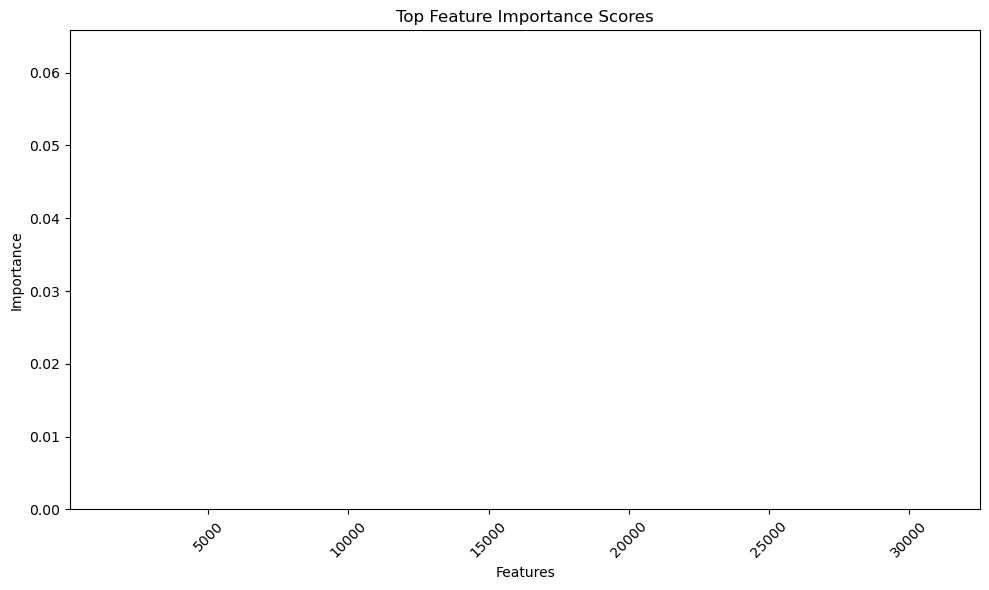

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('select_k_best', SelectKBest(score_func=f_regression, k=1000)), 
    ('regressor', RandomForestRegressor())
])

X = wine_reviews['description']
y = wine_reviews['points']

pipeline.fit(X, y)

# feature importance 
feature_importances = pipeline.named_steps['regressor'].feature_importances_
feature_indices = pipeline.named_steps['select_k_best'].get_support(indices=True)
feature_importance_scores = dict(zip(feature_indices, feature_importances))

# Sort the feature importance scores in descending order
sorted_scores = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top N important features
top_n = 10
top_features = sorted_scores[:top_n]

# Extract the feature indices and importance scores
feature_indices = [feature_idx for feature_idx, _ in top_features]
importances = [importance for _, importance in top_features]


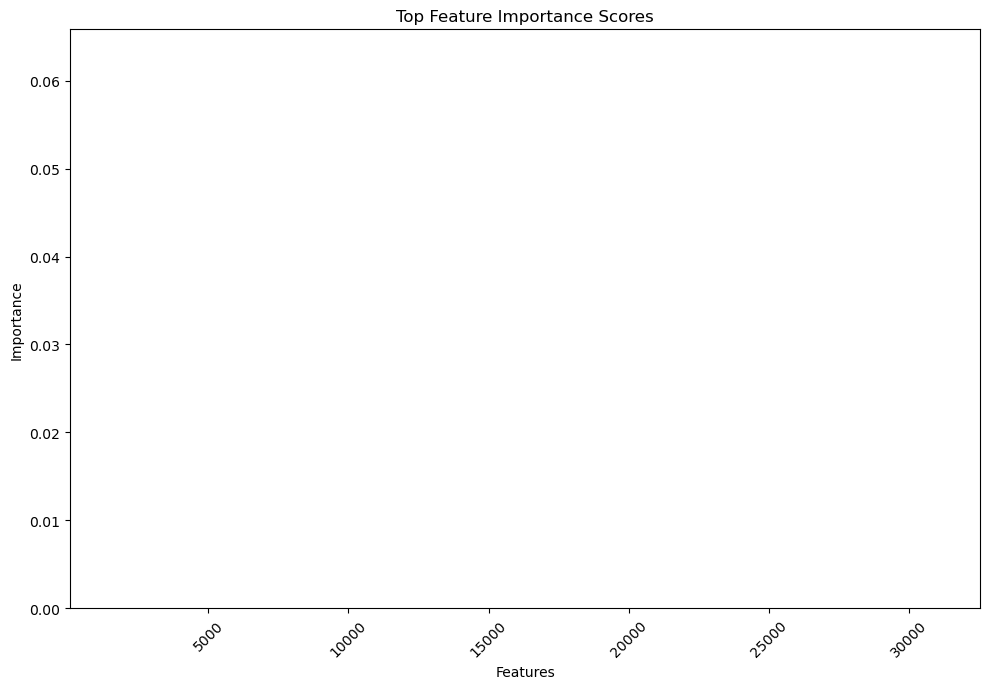

In [19]:
plt.figure(figsize=(10, 7))
plt.bar(feature_indices, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top Feature Importance Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
#wine_reviews = wine_reviews.drop(columns = ['taster_twitter_handle'])
#wine_reviews.head()
importances
feature_indices

[10947, 23119, 31049, 1552, 3287, 28010, 25089, 19082, 27859, 16128]

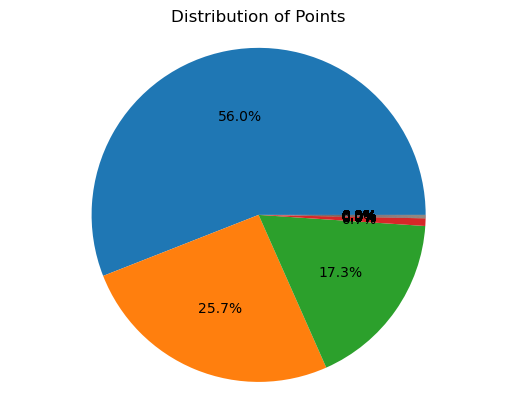

In [ ]:
ranges = ['80-85', '85-90', '90-95', '95-100']

# Count the number of points in each range
points_counts = wine_reviews.points.apply(lambda x: pd.cut([x], [80, 85, 90, 95, 100], labels=ranges)).value_counts()

# Create the pie chart
plt.pie(points_counts, labels=points_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Points')
plt.axis('equal')

# Display the chart
plt.show()

